### Importing Modules (p.44)

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The NumPy Array Object (p.44)

In [2]:
# an ndarray instance
# using a nested Python list
data = np.array([
    [1, 2], 
    [3, 4], 
    [5, 6]
])

In [3]:
type(data)

numpy.ndarray

In [4]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [5]:
data.ndim

2

In [6]:
data.shape

(3, 2)

In [7]:
data.size

6

In [8]:
# all elements in an array have same data type
# homogeneous data
data.dtype

dtype('int64')

In [9]:
data.nbytes

48

In [10]:
data.itemsize

8

In [11]:
data.itemsize*data.size

48

```
size : int
    Number of elements in the array.

itemsize : int
    Length of one array element in bytes.

nbytes : int
    Total bytes consumed by the elements of the array.
```
[Source : numpy.org](https://numpy.org/doc/1.16/reference/generated/numpy.ndarray.html)


#### Data Types (p.46)

In [12]:
np.array([1, 2, 3], dtype=np.int)

array([1, 2, 3])

In [13]:
np.array([1, 2, 3], dtype=np.float)

array([1., 2., 3.])

In [14]:
np.array([1, 2, 3], dtype=np.complex)

array([1.+0.j, 2.+0.j, 3.+0.j])

In [15]:
data = np.array([1, 2, 3], dtype=np.float)
data

array([1., 2., 3.])

In [16]:
data.dtype

dtype('float64')

In [17]:
data = np.array(data, dtype=np.int)

In [18]:
data.dtype

dtype('int64')

In [19]:
data

array([1, 2, 3])

In [20]:
data = np.array([1, 2, 3], dtype=np.float)
data

array([1., 2., 3.])

In [21]:
data.astype(np.int)

array([1, 2, 3])

In [22]:
# same as following
# d1 = np.array([1, 2, 3], dtype=np.float64)
# d1 = np.array([1, 2, 3], dtype='float64')
# https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html#data-types
# https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.dtypes.html#specifying-and-constructing-data-types
d1 = np.array([1, 2, 3], dtype=float)

In [23]:
# same as following
# d2 = np.array([1, 2, 3], dtype=np.complex).itemsize
# d2 = np.array([1, 2, 3], dtype='complex').itemsize
d2 = np.array([1, 2, 3], dtype=complex)

In [24]:
d1 + d2

array([2.+0.j, 4.+0.j, 6.+0.j])

In [25]:
(d1 + d2).dtype

dtype('complex128')

In [26]:
np.sqrt(np.array([-1, 0, 1]))

/Users/geeyeol/.pyenv/versions/3.7.1/envs/python3-staging/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([nan,  0.,  1.])

In [27]:
np.sqrt(np.array([-1, 0, 1]), dtype=complex)

array([0.+1.j, 0.+0.j, 1.+0.j])

In [28]:
data = np.array([1, 2, 3], dtype=complex)
data

array([1.+0.j, 2.+0.j, 3.+0.j])

In [29]:
data.real

array([1., 2., 3.])

In [30]:
data.imag

array([0., 0., 0.])

#### Order of Array Data in Memory (p.49)

In [31]:
# multidimensional arrays are stored contiguously
# e.g. two-dimensional array
# row-major format ('C') : store the rows after each other,
# column-major format ('F') : store the columns one after another

### Creating Arrays (p.50)

#### Arrays Created from Lists and Other Array-Like Objects (p.52)

In [32]:
data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [33]:
data.ndim

1

In [34]:
data.shape

(4,)

In [35]:
data = np.array([
    [1, 2],
    [3, 4]
])
data

array([[1, 2],
       [3, 4]])

In [36]:
data.ndim

2

In [37]:
data.shape

(2, 2)

#### Arrays Filled with Constant Values (p.52)

In [38]:
# data type defaults to float64
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [39]:
np.ones(4)

array([1., 1., 1., 1.])

In [40]:
data= np.ones(4)

In [41]:
data.dtype

dtype('float64')

In [42]:
data = np.ones(4, dtype=np.int64)

In [43]:
data.dtype

dtype('int64')

In [44]:
x1 = 5.4 * np.ones(10)

In [45]:
# more efficient because it
# avoids the multiplication
x2 = np.full(10, 5.4)

In [46]:
# comparison1
%timeit 5.4 * np.ones(10)
%timeit np.full(10, 5.4)

2.6 µs ± 60.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.72 µs ± 56.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [47]:
# comparison2
def measure_execution_time(f, n):

    sample = [10**x for x in range(n)]
    result = []

    for i in sample:
    
        start = time.time()
        f(i)
        end = time.time()
        execution_time = end-start
        result.append(execution_time)
    
    
    return result

def compare_execution_time(n):
    
    f_one = lambda x : 5.4 * np.ones(x)
    f_full = lambda x : np.full(x, 5.4)
    
    one_result = measure_execution_time(f_one, n)
    full_result = measure_execution_time(f_full, n)

    plt.xlabel("number of elements in 1-d array (10^x)")
    plt.ylabel("seconds elapsed")
    plt.plot(range(n), one_result, 'o', label='np.one')
    plt.plot(range(n), full_result, 'o', label='np.full')
    plt.legend()
    plt.show();

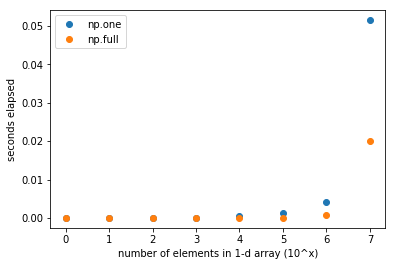

In [48]:
# passing large number can cause OOM
compare_execution_time(8)

In [50]:
# returns an array of uninitialized (arbitrary) data
x1 = np.empty(5)
x1

array([ 1. ,  2. ,  2.5,  5. , 10. ])

In [51]:
x1.fill(3.0)
x1

array([3., 3., 3., 3., 3.])

In [52]:
x2 = np.full(5, 3.0)
x2

array([3., 3., 3., 3., 3.])

#### Arrays Filled with Incremental Sequences (p.54)

In [53]:
# start <= x < end
np.arange(0.0, 10, 1)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [54]:
# start <= x <= end
# recommend when increment is a noninteger
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

#### Arrays Filled with Logarithmic Sequences (p.54)

In [55]:
# logarithmic increment
# start = 10^0
# end = 10^2
np.logspace(0, 2, 5)

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

#### Meshgrid Arrays (p.55)

In [56]:
x = np.array([-1, 0, 1])
y = np.array([-2, 0, 2])
X, Y = np.meshgrid(x, y)

In [57]:
X

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [58]:
Y

array([[-2, -2, -2],
       [ 0,  0,  0],
       [ 2,  2,  2]])

In [59]:
Z = (X + Y) ** 2
Z

array([[9, 4, 1],
       [1, 0, 1],
       [1, 4, 9]])

#### Creating Uninitialized Arrays (p.56)

In [60]:
# create an array without init process
# recommended when init takes place later
# to save some memory
# but np.zeros can be safer due to arbitrary values
np.empty(3, dtype=np.float)

array([ 2.31584178e+077, -1.49457979e-154, -4.34321318e-311])

#### Creating Arrays with Properties of Other Arrays (p.56)

In [61]:
def f(x):
    y = np.ones_like(x)
    return x+y

In [62]:
x1

array([3., 3., 3., 3., 3.])

In [63]:
f(x1)

array([4., 4., 4., 4., 4.])

#### Creating Matrix Arrays (p.57)

In [64]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [65]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [66]:
np.eye(3, k=1)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [67]:
np.eye(3, k=-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [68]:
data = np.arange(0, 20, 5)
np.diag(data)

array([[ 0,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 15]])

### Indexing and Slicing (p.58)

#### One-Dimensional Arrays (p.58)

In [69]:
a = np.arange(0, 11)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [70]:
a[0]

0

In [71]:
a[-1]

10

In [72]:
a[4]

4

In [73]:
a[1:-1]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
a[1:-1:2]

array([1, 3, 5, 7, 9])

In [75]:
a[:5]

array([0, 1, 2, 3, 4])

In [76]:
a[-5:]

array([ 6,  7,  8,  9, 10])

In [77]:
a[::-2]

array([10,  8,  6,  4,  2,  0])

#### Multidimensional Arrays

In [78]:
f = lambda m, n : n + 10 * m
A = np.fromfunction(f, (6, 6), dtype=int)
A

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [79]:
A[:, 1]

array([ 1, 11, 21, 31, 41, 51])

In [80]:
A[1, :]

array([10, 11, 12, 13, 14, 15])

In [81]:
A[:3, :3]

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [82]:
A[3:, :3]

array([[30, 31, 32],
       [40, 41, 42],
       [50, 51, 52]])

In [83]:
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [84]:
A[1::2, 1::3]

array([[11, 14],
       [31, 34],
       [51, 54]])

#### Views (p.62)

In [85]:
# extracted subarrays are views of original array
B = A[1:5, 1:5]
B

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44]])

In [86]:
# data of original array is dependent on that of view
# because they're pointing to the same data in memory
B[:, :] = 0
A

array([[ 0,  1,  2,  3,  4,  5],
       [10,  0,  0,  0,  0, 15],
       [20,  0,  0,  0,  0, 25],
       [30,  0,  0,  0,  0, 35],
       [40,  0,  0,  0,  0, 45],
       [50, 51, 52, 53, 54, 55]])

In [87]:
# shallow copy
# equivalent to np.array(..., copy=True)
C = B[1:3, 1:3].copy()
C

array([[0, 0],
       [0, 0]])

In [88]:
C[: :] = 1
C

array([[1, 1],
       [1, 1]])

In [89]:
B

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

#### Fancy Indexing and Boolean-Values Indexing (p.63)

In [90]:
A = np.linspace(0, 1, 11)
A

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [91]:
fancy = np.array([0, 2, 4])
# returns an independent array
A[fancy]

array([0. , 0.2, 0.4])

In [92]:
A[[0, 2, 4]]

array([0. , 0.2, 0.4])

In [93]:
boolean = A > 0.5
# returns an independent array
A[boolean]

array([0.6, 0.7, 0.8, 0.9, 1. ])

In [94]:
A = np.arange(10)
indices = [2, 4, 6]
B = A[indices]
B[0] = -1
B

array([-1,  4,  6])

In [95]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
A[indices] = -1

In [97]:
A

array([ 0,  1, -1,  3, -1,  5, -1,  7,  8,  9])

In [98]:
B

array([-1,  4,  6])

In [99]:
A = np.arange(10)
B = A[A > 5]
B[0]= -1
B

array([-1,  7,  8,  9])

In [100]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
A[A > 5] = -1

In [102]:
A

array([ 0,  1,  2,  3,  4,  5, -1, -1, -1, -1])

In [103]:
B

array([-1,  7,  8,  9])

### Reshaping and Resizing

In [104]:
# reshaping doesn't change original data
# instead, it changes strides attribute
data = np.array([
    [1, 2],
    [3, 4]
])
np.reshape(data, (1, 4))

array([[1, 2, 3, 4]])

In [105]:
# produces a view of the original array
data.reshape(4)

array([1, 2, 3, 4])

In [106]:
# produces a view of the original array
data = np.array([
    [1, 2],
    [3, 4]
])
data.ravel()

array([1, 2, 3, 4])

In [107]:
# same as np.ravel
# but returns a copy of the original array
data.flatten()

array([1, 2, 3, 4])

In [108]:
data.flatten().shape

(4,)

In [109]:
data = np.arange(0, 5)
column = data[:, np.newaxis]
data

array([0, 1, 2, 3, 4])

In [110]:
column

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [111]:
# same as above
np.expand_dims(data, axis=1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [112]:
row = data[np.newaxis, :]
row

array([[0, 1, 2, 3, 4]])

In [113]:
# same as above
np.expand_dims(data, axis=0)

array([[0, 1, 2, 3, 4]])

In [114]:
data = np.arange(5)

In [115]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [116]:
# returns one-dimensional array of (5, )
np.hstack((data, data, data))

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [117]:
# returns one-dimensional array of (1, 5)
data = data[:, np.newaxis]
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

### Vectorized Expressions

#### Arithmetic Operations

#### Elementwise Functions

#### Aggregate Functions

#### Boolean Arrays and Conditional Expressions

#### Set Operations

#### Operations on Arrays

### Matrix and Vector Operations